In [1]:
from config import *
config_chapter2_1()
# This is need to render the plots in this chapter
from plots.chapter2_1 import *

Finished!


# Import Libraries

In [2]:
import numpy as np
import datetime

import torch
import torch.optim as optim 
import torch.nn as nn 
import torch.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split 
from torch.utils.tensorboard import SummaryWriter 

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('fivethirtyeight')

# Going Classy

## The Class

In [3]:
# A complete empty (and useless) class
class StepByStep(object):
  pass

## The Constructors

### Arguments

In [4]:
class StepByStep(object):
  def __init__(self, model, loss_fn, optimizer):
    # Here we define the attributes for our class

    # We start by storying the arguments as attributes
    # to use them later
    self.model = model
    self.loss_fn = loss_fn
    self.optimizer = optimizer 
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # Lets send the model to the specified device right away
    self.model.to(self.device)

  def to(self, device):
    # This method allows the use to specify a different device
    # It sets the corresponding attribute (to be used later in
    # the mini-batches) and sends the model to the device
    self.device = device
    self.model.to(self.device)

### Placeholders

In [5]:
class StepByStep(object):
    def __init__(self, model, loss_fn, optimizer):
      # Here we define the attributes for our class

      # We start by storying the arguments as attributes
      # to use them later
      self.model = model
      self.loss_fn = loss_fn
      self.optimizer = optimizer 
      self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
      # Lets send the model to the specified device right away
      self.model.to(self.device)

      # These attributes are defined here, but since they are
      # not available at the moment of creation, we keep them None
      self.train_loader = None
      self.val_loader = None
      self.writer = None

      # These attributes are going to be computed internally
      self.losses = None
      self.val_losses = None
      self.total_epochs = 0

    def to(self, device):
      # This method allows the use to specify a different device
      # It sets the corresponding attribute (to be used later in
      # the mini-batches) and sends the model to the device
      self.device = device
      self.model.to(self.device)

    def set_loader(self, train_loader, val_loader=None):
      # This method allows the user to define which train_loader
      # (and val_loader, optionally) to use
      # Both loader are then assigned to attributes of the class
      # so they can be reffered later 
      self.train_loader = train_loader
      self.val_loader = val_loader

    def set_tensorboard(self, name, folder='runs'):
      # This method allows the user to create a SummaryWriter to
      # interface with TensorBoard
      suffix = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
      self.writer = SummaryWriter('{}/{}_{}'.format(folder, name, suffix))


### Functions

In [6]:
class StepByStep(object):
    def __init__(self, model, loss_fn, optimizer):
      # Here we define the attributes for our class

      # We start by storying the arguments as attributes
      # to use them later
      self.model = model
      self.loss_fn = loss_fn
      self.optimizer = optimizer 
      self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
      # Lets send the model to the specified device right away
      self.model.to(self.device)

      # These attributes are defined here, but since they are
      # not available at the moment of creation, we keep them None
      self.train_loader = None
      self.val_loader = None
      self.writer = None

      # These attributes are going to be computed internally
      self.losses = []
      self.val_losses = []
      self.total_epochs = 0

      # Creates the train_step function for our model
      # loss function and optimizer
      # Note: there are NO ARGS there! It makes use of the class
      # attributes directly
      self.train_step = self._make_train_step()
      # Creates the val_step function for our model and loss
      self.val_step = self._make_val_step()

    def to(self, device):
      # This method allows the use to specify a different device
      # It sets the corresponding attribute (to be used later in
      # the mini-batches) and sends the model to the device
      self.device = device
      self.model.to(self.device)

    def set_loader(self, train_loader, val_loader=None):
      # This method allows the user to define which train_loader
      # (and val_loader, optionally) to use
      # Both loader are then assigned to attributes of the class
      # so they can be reffered later 
      self.train_loader = train_loader
      self.val_loader = val_loader

    def set_tensorboard(self, name, folder='runs'):
      # This method allows the user to create a SummaryWriter to
      # interface with TensorBoard
      suffix = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
      self.writer = SummaryWriter('{}/{}_{}'.format(folder, name, suffix))


### Set Methods

In [7]:
def _make_train_step(self):
  # This method does not need ARGS... it can refer to
  # the attributes: self.model, self.loss_fn and self.optimizer

  # Builds function that performs a step in the train loop
  def perform_train_step(x, y):
    # Sets model to TRAIN mode
    self.model.train()


    # Step 1 - Computes our model's predicted output - forward pass
    yhat = self.model(x)
    # Step 2 - Computes the loss 
    loss = self.loss_fn(yhat, y)
    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    # Step 4 - Updates parameters using gradients and the learning rate
    self.optimizer.step()
    self.optimizer.zero_grad()

    # Returns the loss
    return loss.item()

  # Returns the function that will be called inside the train loop
  return perform_train_step

In [8]:
def _make_val_step(self):
  # Builds function that performs a step in the validation loop
  def perform_val_step(x, y):
    # Sets model to EVAL mode
    self.model.eval()


    # Step 1 - Computes our model's predicted output - forward pass
    yhat = self.model(x)
    # Step 2 - Computes the loss
    loss = self.loss_fn(yhat, y)
    # There is no need to compute steps 3 and 4,
    # since we don't update parameters during evaluation
    return loss.item()

  return perform_val_step


In [9]:
# ATTENTION! Using SETATTR only for educational purposes only :-)
setattr(StepByStep, '_make_train_step', _make_train_step)
setattr(StepByStep, '_make_val_step', _make_val_step)

### setattr

In [10]:
class Dog(object):
  def __init__(self, name):
    self.name = name

In [11]:
rex = Dog('Rex')
print(rex.name)

Rex


In [12]:
def bark(dog):
  print('{} barks: "Woof!"'.format(dog.name))

In [13]:
bark(rex)

Rex barks: "Woof!"


In [14]:
def bark(self):
  print('{} barks: "Woof!"'.format(self.name))


setattr(Dog, 'bark', bark)

In [15]:
fido = Dog("Fido")
fido.bark()

Fido barks: "Woof!"


In [16]:
rex.bark()

Rex barks: "Woof!"


## Training Method

### Mini-Batch

In [17]:
def _mini_batch(self, validation=False):
    # The mini-batch can be used with both loaders
    # The argument `validation` defines which loader and
    # corresponding step function is going to be used

    if validation:
      data_loader = self.val_loader
      step = self.val_step

    else:
      data_loader = self.train_loader
      step = self.train_step 

    if data_loader is None:
        return None

    # Once the data loader and step function, this is the same
    # mini-batch loop we had before 
    mini_batch_losses = []
    for x_batch, y_batch in data_loader:
        x_batch = x_batch.to(self.device)
        y_batch = y_batch.to(self.device)


        mini_batch_loss = step(x_batch, y_batch)
        mini_batch_losses.append(mini_batch_loss)


    loss = np.mean(mini_batch_losses)

    return loss




setattr(StepByStep, '_mini_batch', _mini_batch)

  

### Training Loop

In [18]:
def set_seed(self, seed=42):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    np.random.seed(seed)

setattr(StepByStep, 'set_seed', set_seed)

In [19]:
def train(self, n_epochs, seed=42):
    # to ensure reproducibility of the training process
    self.set_seed(seed)

    for epoch in range(n_epochs):
      # keep track of the numbers of epochs
      # by updating the corresponding attribute
      self.total_epochs += 1


      # inner loop
      # Performs training using mini-batches
      loss = self._mini_batch(validation=False)
      self.losses.append(loss)

      # VALIDATION
      # no gradients in a validation!
      with torch.no_grad():
        # Performs evaluation using mini-batches
        val_loss = self._mini_batch(validation=True)
        self.val_losses.append(val_loss)

      
      # If a SummyWriter has been set .....
      if self.writer:
          scalars = {'training': loss}
          if val_loss is not None:
            scalars.update({'validation': val_loss})
          # Records both losses for each epoch under the main tag "loss"
          self.writer.add_scalars(main_tag = 'loss', 
                                  tag_scalar_dict=scalars,
                                  global_step=epoch)
          
    if self.writer:
      # Flushes the writer
      self.writer.flush()




setattr(StepByStep, 'train', train)


## Saving and Loading Methods

### Savings

In [20]:
def save_checkpoint(self, filename):
    # Build dictionary with all elements for resuming training
    checkpoint = {'epoch': self.total_epochs,
                  'model_state_dict': self.model.state_dict(),
                  'optimizer_state_dict': self.optimizer.state_dict(),
                  'loss': self.losses,
                  'val_loss': self.val_losses}

    torch.save(checkpoint, filename)

setattr(StepByStep, 'save_checkpoint', save_checkpoint)

### Loading

In [21]:
def load_checkpoint(self, filename):
    # Load dictionary 
    checkpoint = torch.load(filename)

    # Restore state for model and optimizer
    self.model.load_state_dict(checkpoint['model_state_dict'])
    self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])


    self.total_epochs = checkpoint['epoch']
    self.losses = checkpoint['loss']
    self.val_losses = checkpoint['val_loss']

    self.model.train()
    # always use TRAIN for resuming training

setattr(StepByStep, 'load_checkpoint', load_checkpoint)

### Making Predictions

In [38]:
def predict(self, x):
    # Set to evaluation mode for prediction
    self.model.eval()
    # Takes a Numpy input and make it a float tensor
    x_tensor = torch.as_tensor(x).float()
    # Send input to device and uses for model prediction
    y_hat_tensor = self.model(x_tensor.to(self.device))
    # Set it back to train mode
    self.model.train()
    # Detaches it, brings it to CPU and back to Numpy
    return y_hat_tensor.detach().cpu().numpy()

setattr(StepByStep, 'predict', predict)

## Visualizing Methods

### Losses

In [39]:
def plot_losses(self):
    fig = plt.figure(figsize=(10, 4))
    plt.plot(self.losses, label='Training Loss', c='b')
    if self.val_loader:
        plt.plot(self.val_losses, label='Validation Loss', c='r')
    plt.yscale('log')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    return fig 


setattr(StepByStep, 'plot_losses', plot_losses)

### Model Graph

In [40]:
def add_graph(self):
  if self.train_loader and self.writer:
      # Fetches a single mini-batch so we can use add_graph
      x_sample, y_sample = next(iter(self.train_loader))
      self.writer.add_graph(self.model, x_sample.to(self.device))


setattr(StepByStep, 'add_graph', add_graph)

## Classy Pipeline

### Data Generation

In [41]:
# Runs data generation - so we do not need to copy code here
%run -i data_generation/simple_linear_regression.py

<Figure size 432x288 with 0 Axes>

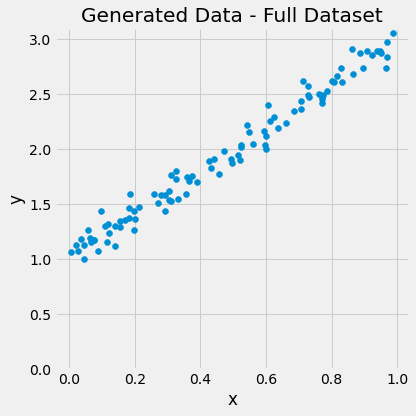

In [42]:
fig = figure1(x, y)

### Data Preparation V2

In [43]:
# load data_preparation/v2.py

torch.manual_seed(13)

# Builds tensors from numpy arrays BEFORE split
x_tensor = torch.as_tensor(x).float()
y_tensor = torch.as_tensor(y).float()

# Builds dataset containing ALL data points
dataset = TensorDataset(x_tensor, y_tensor)

# Performs the split 
ratio = .8
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val = n_total - n_train 

train_data, val_data = random_split(dataset, [n_train, n_val])

# Builds a loader of each set 
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=16)

### Model Configuration V4

In [44]:
%%writefile model_configuration/v4.py

# Set learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1))

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Overwriting model_configuration/v4.py


In [45]:
%run -i model_configuration/v4.py

<Figure size 432x288 with 0 Axes>

In [46]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])


## Model Training

### Cell 2.1.1

In [47]:
sbs = StepByStep(model, loss_fn, optimizer)
sbs.set_loader(train_loader, val_loader)
sbs.set_tensorboard('classy')

In [48]:
print(sbs.model == model)
print(sbs.model)

True
Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


### Cell 2.1.2

In [49]:
sbs.train(n_epochs=200)

In [50]:
print(model.state_dict()) # remember, model == sbs.model
print(sbs.total_epochs)

OrderedDict([('0.weight', tensor([[1.9416]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
200


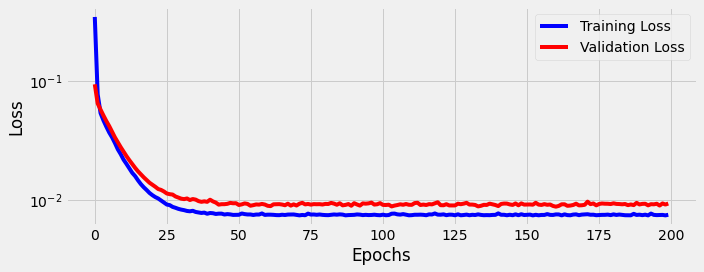

In [51]:
fig = sbs.plot_losses()

### Making Predictions

In [52]:
new_data = np.array([.5, .3, .7]).reshape(-1, 1)
new_data

array([[0.5],
       [0.3],
       [0.7]])

In [53]:
predictions = sbs.predict(new_data)
predictions

array([[1.9942763],
       [1.605955 ],
       [2.3825977]], dtype=float32)

### checkpointing

### Cell 2.1.3

In [54]:
sbs.save_checkpoint('model_checkpoint.pth')

### Resuming Training

In [55]:
%run -i model_configuration/v4.py

<Figure size 432x288 with 0 Axes>

In [56]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])


### Cell 2.1.4

In [57]:
new_sbs = StepByStep(model, loss_fn, optimizer)

### Cell 2.1.5

In [58]:
new_sbs.load_checkpoint('model_checkpoint.pth')

In [59]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9416]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])


### Cell 2.1.6

In [60]:
new_sbs.set_loader(train_loader, val_loader)
new_sbs.train(n_epochs=50)

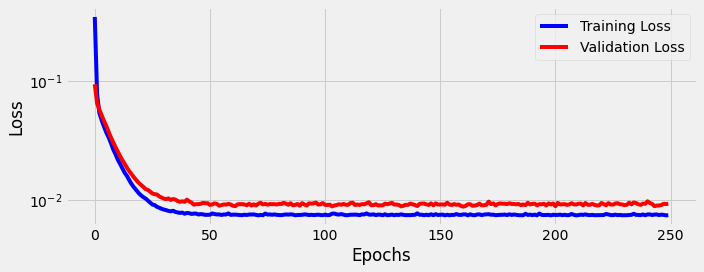

In [61]:
fig = new_sbs.plot_losses()

In [62]:
print(sbs.model.state_dict())

OrderedDict([('0.weight', tensor([[1.9416]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])


# Putting It All Altogether

In [63]:
# %load data_preparation/v2.py

torch.manual_seed(13)

# Builds tensors from numpy arrays BEFORE split
x_tensor = torch.as_tensor(x).float()
y_tensor = torch.as_tensor(y).float()

# Builds dataset containing ALL data points
dataset = TensorDataset(x_tensor, y_tensor)

# Performs the split
ratio = .8
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val = n_total - n_train

train_data, val_data = random_split(dataset, [n_train, n_val])

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_data,
    batch_size = 16,
    shuffle = True, 
)

val_loader = DataLoader(dataset=val_data, batch_size=16)

In [65]:
# %load model_configuration/v4.py

# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model
model = nn.Sequential(nn.Linear(1, 1))

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Define a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

In [67]:
n_epochs = 200

sbs = StepByStep(model, loss_fn, optimizer)
sbs.set_loader(train_loader, val_loader)
sbs.set_tensorboard('classy')
sbs.train(n_epochs=n_epochs)

In [68]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9416]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
